## Tugas Besar Pemrograman Kecerdasan Artifisial

Perbandingan Kinerja KNN dan Regresi untuk Prediksi Keputusan Pembelian Mobil

Kelompok: 2

Anggota:

1.   M. Rafli Adhan S - 1301223042
2.   Christoper Daeng Kilantan - 1301223402

### Pendahuluan dan Paparan Data


**Latar Belakang:**

Industri otomotif merupakan salah satu sektor ekonomi yang terus berkembang dengan persaingan yang semakin ketat. Dalam upaya untuk meningkatkan penjualan, perusahaan otomotif harus memahami perilaku dan preferensi konsumen untuk membuat strategi pemasaran yang lebih efektif dan efisien. Salah satu cara untuk mencapai pemahaman ini adalah dengan menggunakan analisis data dan metode prediksi keputusan pembelian mobil.

**Masalah yang Ingin Diselesaikan:**

Dalam dunia otomotif, memahami perilaku dan keputusan pembelian konsumen adalah kunci keberhasilan bagi produsen dan penjual mobil. Faktor-faktor seperti harga, fitur mobil, pendapatan pembeli, usia, dan preferensi lainnya memengaruhi keputusan pembelian konsumen. Dengan data historis mengenai pembelian mobil, prediksi keputusan pembelian di masa depan menjadi sangat penting untuk membantu pengambilan keputusan bisnis, seperti:

1.   Segmentasi Pasar: Menentukan segmen pelanggan yang kemungkinan besar akan membeli mobil berdasarkan karakteristik tertentu.
2.   Strategi Penetapan Harga: Memahami batas harga yang dapat diterima konsumen berdasarkan pola pembelian sebelumnya.
3. Kampanye Pemasaran: Menargetkan kampanye pemasaran kepada kelompok pelanggan yang memiliki potensi tertinggi untuk membeli mobil.
4. Pengembangan Produk: Mengidentifikasi fitur yang paling diinginkan konsumen untuk pengembangan model mobil baru.

**Tujuan Penelitian:**

Melakukan Perbandingan Performa KNN dan Regresi (Linear atau Logistik) dalam memprediksi keputusan pembelian mobil menggunakan metrik evaluasi seperti:

*   Akurasi: Untuk klasifikasi.
*   Precision, Recall, F1-score: Untuk mengevaluasi keseimbangan performa model dalam klasifikasi.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('/content/calonpembeli_ch5.csv')

Sumber dataset dari buku pengenalan machine Learning yang ditulis oleh Dios Kurniawan, M. Sc

dataset yang digunakan yaitu calonpembeli_ch5.csv

Link : http://buku.dioskurn.com/



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [ ]:
data.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


Terdapat data yang tidak realistis, pada baris 'Usia' dimana batas maksimal Calon Pembeli Mobil ada di umur 164 tahun. dapat dipastikan jika data ini sedikit keliru.


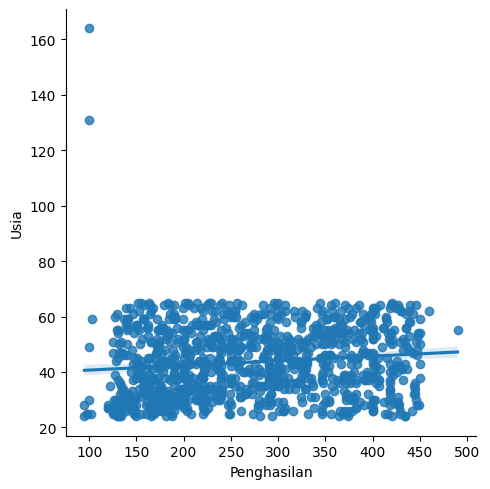

In [ ]:
sns.lmplot(x='Penghasilan', y='Usia', data=data)

dapat dilihat dari gambar diatas terdapat 2 data anomali yang berada pada titk 164 dan titik 131 pada label 'usia'. Hal ini jika dibiarkan akan memengaruhi kinerja dan keakuratan model machine learning.

In [ ]:
#proses pre-processing dataset
data_Bersih = data[data['Usia']<= 100]

In [ ]:
data_Bersih.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,501.073146,43.323647,1.469940,0.480962,0.953908,270.430862,0.634269
std,288.823862,11.774139,1.073338,0.499888,0.801127,95.026802,0.481876
min,1.000000,24.000000,0.000000,0.000000,0.000000,95.000000,0.000000
25%,252.250000,33.000000,1.000000,0.000000,0.000000,187.250000,0.000000
50%,501.500000,43.000000,1.000000,0.000000,1.000000,259.000000,1.000000
75%,750.750000,53.000000,2.000000,1.000000,2.000000,352.750000,1.000000
max,1000.000000,65.000000,3.000000,1.000000,4.000000,490.000000,1.000000


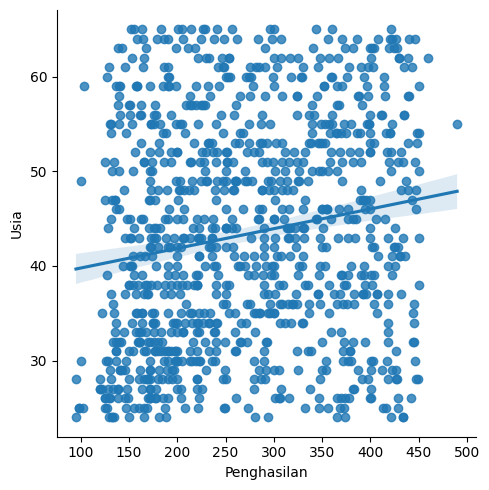

In [ ]:
sns.lmplot(x='Penghasilan', y='Usia', data=data_Bersih)

In [ ]:
data_Bersih.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [ ]:
data_Bersih['Beli_Mobil'].value_counts()

,count
Beli_Mobil,
1,633
0,365


In [ ]:
#pembagian data Training (80%) dan Testing (20%)
import sklearn.model_selection as ms
x = data_Bersih[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = data_Bersih['Beli_Mobil']
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((798, 5), (200, 5), (798,), (200,))

**Alasan Kenapa dipilihnya metode KNN dan Regresi:**

1.   K-Nearest Neighbors (KNN):

*   Kemudahan Implementasi dan Fleksibilitas, KNN merupakan metode sederhana yang tidak memerlukan asumsi distribusi data. algoritma ini bekerja berdasarkan data dalam ruang fitur sehingga sangat fleksibel untuk berbagai tipe data baik itu klasifikasi maupun regresi.
*   Kesesuaian untuk Prediksi Keputusan Pembelian, dalam kasus **klasifikasi** keputusan pembelian mobil, KNN secara alami akan mengelompokkan data berdasarkan kemiripan (similarity) dengan data yang sudah ada. sedangkan untuk **regresi** menggunakan rata-rata atau nilai terdekat untuk menghasilkan prediksi.
*   Non-Linearitas, KNN tidak memerlukan hubungan linear antar variable.
*   Penanganan Data yang Multidimensi, Algoritma ini mampu menangani banyak variabel fitur tanpa memerlukan pra-pemrosesan kompleks seperti transformasi data ke fungsi linear.

2.   Regresi (Linear dan Logistik):

*   Interpretasi yang Mudah, Regresi memberikan pemahaman tentang bagaimana setiap fitur dimana memengaruhi hasil Prediksi.
*   Kesesuaian untuk Jenis Data, Sangat baik untuk prediksi numerik dan Cocok untuk prediksi klasifikasi biner.
*   Efisiensi Komputasi, Regresi membutuhkan waktu komputasi yang jauh lebih sedikit dibandingkan KNN, terutama pada dataset besar, karena tidak memerlukan pencarian tetangga pada setiap prediksi.
*   Validasi Asumsi Relasi Data, Regresi efektif ketika hubungan antar variabel independen dan dependen relatif linear atau memiliki transformasi yang dapat dimodelkan.


## Metode dan Eksperimen

Pengujian metode  K-Nearest-Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# List untuk menyimpan hasil akurasi
results_euclidean = []
results_manhattan = []

# Range nilai k yang akan diuji
k_values = range(1, 21)

# Loop untuk mencoba berbagai nilai k
for k in k_values:
    # Model dengan Euclidean Distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean.fit(x_train, y_train)
    y_pred_euclidean = knn_euclidean.predict(x_test)
    acc_euclidean = accuracy_score(y_test, y_pred_euclidean)
    results_euclidean.append((k, acc_euclidean))

    # Model dengan Manhattan Distance
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan.fit(x_train, y_train)
    y_pred_manhattan = knn_manhattan.predict(x_test)
    acc_manhattan = accuracy_score(y_test, y_pred_manhattan)
    results_manhattan.append((k, acc_manhattan))

In [ ]:
# Mencari k terbaik untuk Euclidean
best_k_euclidean, best_acc_euclidean = 0, 0
for k, acc in results_euclidean:
    if acc > best_acc_euclidean:
        best_k_euclidean, best_acc_euclidean = k, acc
print(f"Best k for Euclidean: {best_k_euclidean}, Accuracy: {best_acc_euclidean:.2f}")

# Mencari k terbaik untuk Manhattan
best_k_manhattan, best_acc_manhattan = 0, 0
for k, acc in results_manhattan:
    if acc > best_acc_manhattan:
        best_k_manhattan, best_acc_manhattan = k, acc
print(f"Best k for Manhattan: {best_k_manhattan}, Accuracy: {best_acc_manhattan:.2f}")



Best k for Euclidean: 20, Accuracy: 0.94
Best k for Manhattan: 17, Accuracy: 0.95


Berdasarkan hasil:

1.   Best k for Euclidean: nilai k terbaik adalah 20, dengan akurasi sebesar 94%. model KNN dengan Euclidean distance memberikan performa terbaik saat mempertimbangkan 20 tetangga terdekat untuk menentukan klasifikasi data.

2.    Best k for Manhattan: Nilai k terbaik adalah 17, dengan akurasi sebesar 95%. Ini menunjukkan bahwa model KNN dengan Manhattan distance mencapai performa optimal saat mempertimbangkan 17 tetangga terdekat.





In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

# Fungsi untuk menghitung metrik tambahan
def evaluate_model(y_true, y_pred, metric_name):
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    print(f"{metric_name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

# Evaluasi model terbaik
# Pastikan `best_k_euclidean` dan `best_k_manhattan` adalah integer, bukan list atau tuple
knn_euclidean_best = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric='euclidean')
knn_euclidean_best.fit(x_train, y_train)
y_pred_best_euclidean = knn_euclidean_best.predict(x_test)
evaluate_model(y_test, y_pred_best_euclidean, "Euclidean")

knn_manhattan_best = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='manhattan')
knn_manhattan_best.fit(x_train, y_train)
y_pred_best_manhattan = knn_manhattan_best.predict(x_test)
evaluate_model(y_test, y_pred_best_manhattan, "Manhattan")


Euclidean - Precision: 0.94, Recall: 0.98, F1-Score: 0.96
Manhattan - Precision: 0.95, Recall: 0.99, F1-Score: 0.97


Hasil Evaluasi:

1.   Precision: Ini berarti bahwa bahwa model dengan jarak Manhattan lebih sedikit menghasilkan prediksi positif yang salah (false positives), berarti model Manhattan lebih konservatif dalam memutuskan bahwa sebuah data adalah positif.
2.   Recall: menunjukkan bahwa model Manhattan lebih sedikit kehilangan prediksi positif yang benar (false negatives), menunjukkan bahwa model Manhattan lebih baik dalam mendeteksi seluruh kasus positif.
3.   F1-Score: F1-Score adalah rata-rata harmonis dari Precision dan Recall, sehingga performa keseluruhan Manhattan lebih baik dalam menyeimbangkan keduanya.


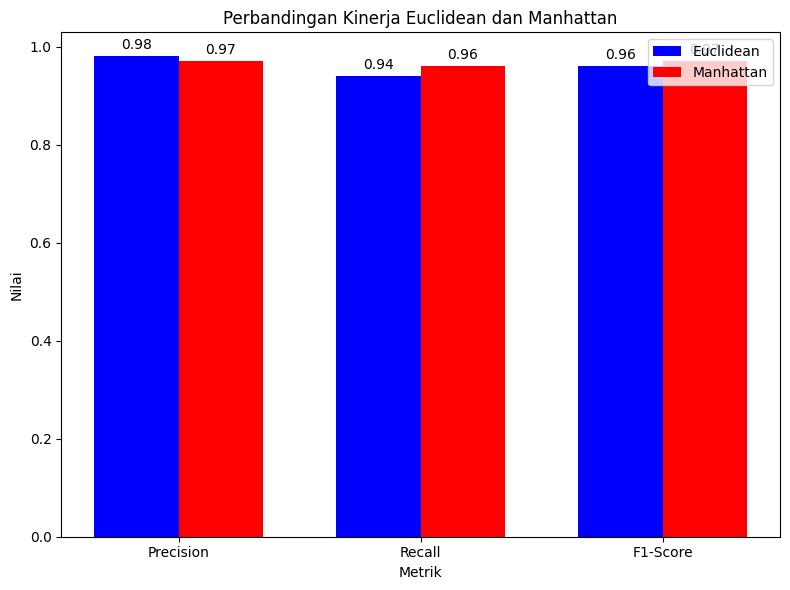

In [ ]:
# Data evaluasi
labels = ['Precision', 'Recall', 'F1-Score']
euclidean_scores = [0.98, 0.94, 0.96]
manhattan_scores = [0.97, 0.96, 0.97]

# Menentukan posisi untuk grafik
x = np.arange(len(labels))  # Posisi untuk masing-masing metrik
width = 0.35  # Lebar bar

# Membuat grafik
fig, ax = plt.subplots(figsize=(8, 6))

# Membuat bar untuk Euclidean dan Manhattan
rects1 = ax.bar(x - width/2, euclidean_scores, width, label='Euclidean', color='b')
rects2 = ax.bar(x + width/2, manhattan_scores, width, label='Manhattan', color='r')

# Menambahkan label, judul, dan keterangan
ax.set_xlabel('Metrik')
ax.set_ylabel('Nilai')
ax.set_title('Perbandingan Kinerja Euclidean dan Manhattan')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Menampilkan nilai di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label
                    textcoords="offset points",
                    ha='center', va='bottom')

# Menambahkan label di atas bar
autolabel(rects1)
autolabel(rects2)

# Menampilkan grafik
plt.tight_layout()
plt.show()

Pengujian metode Regression


In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load dataset
import io
df = pd.read_csv('/content/calonpembeli_ch5.csv')

# Tampilkan 5 data pertama
print(df.head())

   ID  Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil
0   1    32       1        0               0          240           1
1   2    49       2        1               1          100           0
2   3    52       1        0               2          250           1
3   4    26       2        1               1          130           0
4   5    45       3        0               2          237           1


Persiapan Data

In [ ]:
# Pisahkan fitur (X) dan target (Y)
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

# Bagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Bangun dan Latih Model Logistic Regression

In [ ]:
# Buat model Logistic Regression
model = LogisticRegression()

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)


Evaluasi model

In [ ]:
# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.925
Precision: 0.935251798561151
Recall: 0.9558823529411765
F1-Score: 0.9454545454545454
Confusion Matrix:
 [[ 55   9]
 [  6 130]]


Prediksi Data Baru

In [ ]:
# Contoh prediksi data baru
data_baru = [[30, 1, 0, 1, 300]]  # Usia, Status, Kelamin, Memiliki_Mobil, Penghasilan
data_baru = scaler.transform(data_baru)
prediksi = model.predict(data_baru)

if prediksi[0] == 1:
    print("Prediksi: Calon pembeli akan membeli mobil.")
else:
    print("Prediksi: Calon pembeli tidak akan membeli mobil.")

Prediksi: Calon pembeli akan membeli mobil.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Kesimpulan:**

*   KNN cenderung lebih unggul dalam hal recall dan F1-score, yang menunjukkan keseimbangan yang lebih baik antara precision dan recall, serta kemampuan untuk menangani data dengan hubungan yang lebih kompleks atau tidak linear.
*   Regresi dapat lebih mudah diinterpretasikan dan memberikan wawasan lebih jelas tentang hubungan antara fitur dan keputusan pembelian mobil, tetapi mungkin tidak seefektif KNN dalam menangani pola data yang lebih rumit.
*   KNN lebih fleksibel dalam memilih parameter (seperti nilai k) untuk mengoptimalkan kinerja, sementara regresi lebih tergantung pada asumsi linearitas hubungan antar fitur dan hasil.



